<strong><h1>Tugas Data Mining

In [1]:
import pandas as pd

In [2]:
dataset = pd.read_csv('citrus.csv')
dataset

,name,diameter,weight,red,green,blue
0,orange,2.96,86.76,172,85,2
1,orange,3.91,88.05,166,78,3
2,orange,4.42,95.17,156,81,2
3,orange,4.47,95.60,163,81,4
4,orange,4.48,95.76,161,72,9
...,...,...,...,...,...,...
9995,grapefruit,15.35,253.89,149,77,20
9996,grapefruit,15.41,254.67,148,68,7
9997,grapefruit,15.59,256.50,168,82,20
9998,grapefruit,15.92,260.14,142,72,11


In [5]:
dataset.isnull().sum()

name        0
diameter    0
weight      0
red         0
green       0
blue        0
dtype: int64

In [6]:
dataset.corr()

,diameter,weight,red,green,blue
diameter,1.000000,0.999476,-0.217821,-0.396832,0.363307
weight,0.999476,1.000000,-0.214714,-0.392003,0.358916
red,-0.217821,-0.214714,1.000000,0.148937,-0.135900
green,-0.396832,-0.392003,0.148937,1.000000,-0.242495
blue,0.363307,0.358916,-0.135900,-0.242495,1.000000


<AxesSubplot:>

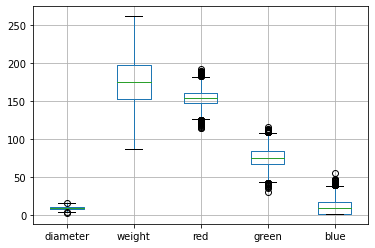

In [8]:
dataset.boxplot()